<a href="https://colab.research.google.com/github/2dot71mily/selection_induced_collider_bias/blob/main/Toy_Causal_DGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import OrderedDict
import numpy as np
from numpy.random import randn

import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
sns.set_context('poster')
sns.set_style('white')

In [ ]:
def sample_from_model(model, eps=None):
    if eps is None:
        eps = randn(10)
    sample = {}
    for var, func in model.items():
        sample[var] = func(eps, **sample)
    return sample


def add_r_p_to_plot(plot, x_axis, y_axis):
    r, p = stats.pearsonr(x_axis, y_axis)
    phantom, = plot.ax_joint.plot([], [], linestyle="", alpha=0)
    plot.ax_joint.legend([phantom],['r = {:.3f}'.format(r)], loc='upper left') 

def plot_joint(model, x_col, y_col, num_samples=1000, annotate=False, 
               comment='', **kwargs):
    samples = [sample_from_model(model) for _ in range(num_samples)]
    data = pd.DataFrame(samples)
    plot = sns.jointplot(data=data, x=x_col, y=y_col, **kwargs)
    title = f"{comment} {x_col.upper()} vs {y_col.upper()}"
    plot.fig.suptitle(title)

    if annotate:
        add_r_p_to_plot(plot, data[x_col], data[y_col])
    plot.savefig(f"{title.replace(' ', '_')}")


def sub_sample_and_plot(model, x_col, y_col, given_variable, num_samples=1000, 
                        annotate=False, comment='', **kwargs):
    observations = [sample_from_model(model) for _ in range(num_samples)]
    data = pd.DataFrame(observations)
    # Conditioning on 'given_variable' being True
    sub_sampled = data[data[given_variable] == True]
    plot = sns.jointplot(data=sub_sampled, x=x_col, y=y_col, **kwargs)
    title = f"{comment} {x_col.upper()} vs {y_col.upper()}"
    plot.fig.suptitle(title)
    if annotate:
        add_r_p_to_plot(plot, sub_sampled[x_col], sub_sampled[y_col])
    plot.savefig(f"toy_plots_{title.replace(' ', '_')}")


# SCM

In [ ]:
noise_larger = 10
w_injection = 1  # Decrease to 0.001 for reduced w-injection

common_model = OrderedDict([])
# w --> s <-- g
common_model['W'] = lambda eps, **kwargs: noise_larger/2 * eps[0]
common_model['G'] = lambda eps, **kwargs: noise_larger * eps[1]
# Change to `W - G` rather than `W + G` to flip dir of correlation
common_model['S'] = lambda eps, W, G, **kwargs: int(W + G +
                                                    eps[2] > noise_larger * 2)

# w --> x <-- g
# x --> y <-- g
model_well_sp = common_model.copy()
model_well_sp['X'] = lambda eps, W, G, **kwargs: w_injection*W + G + eps[3] 
model_well_sp['Y'] = lambda eps, X, G, **kwargs: X + G + eps[4]


# w --> x
# y <-- g
model_under_sp = common_model.copy()
model_under_sp['X'] = lambda eps, W, **kwargs: w_injection*W + eps[3]
model_under_sp['Y'] = lambda eps, G, **kwargs: G + eps[4]


# Plots

In [ ]:
num_samples = 50000

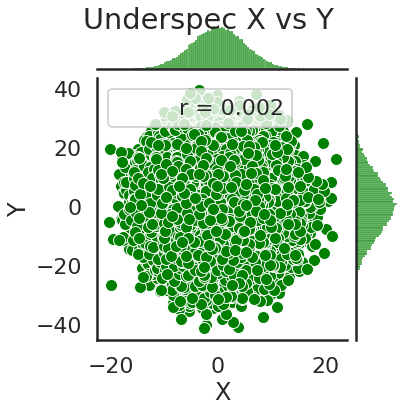

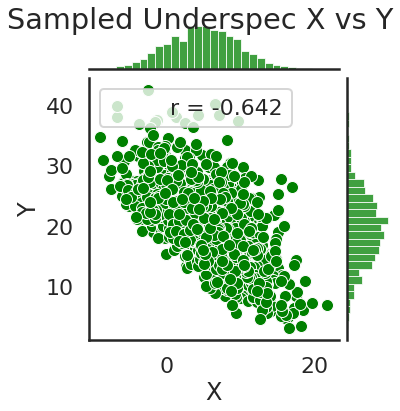

In [ ]:
plot_joint(model_under_sp, 'X', 'Y', num_samples=num_samples,
           color='g', annotate=True, comment='Underspec')

sub_sample_and_plot(model_under_sp, 'X', 'Y', 'S', num_samples=num_samples,
                    color='g', annotate=True, comment='Sampled Underspec')

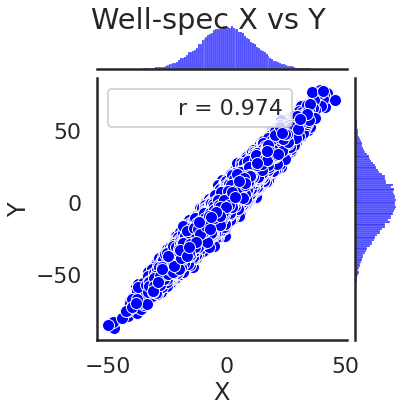

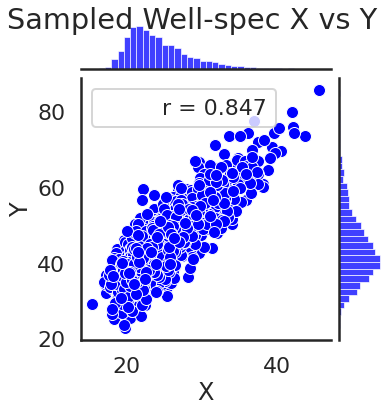

In [ ]:
plot_joint(model_well_sp, 'X', 'Y', num_samples=num_samples,
           color='b', annotate=True, comment='Well-spec')

sub_sample_and_plot(model_well_sp, 'X', 'Y', 'S', num_samples=num_samples,
                    color='b', annotate=True, comment='Sampled Well-spec')

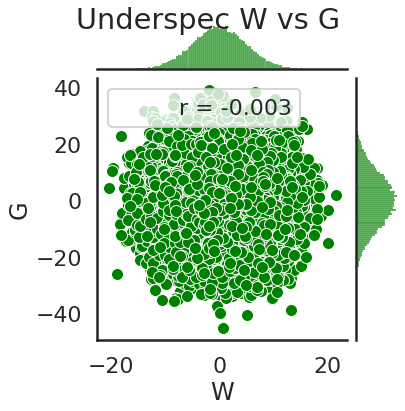

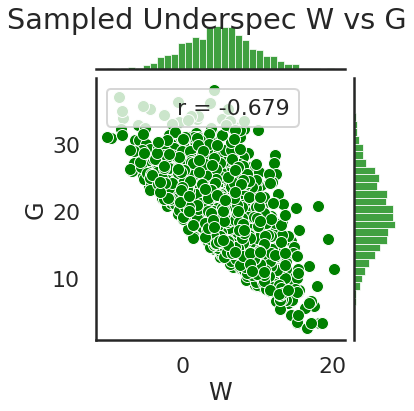

In [ ]:
plot_joint(model_under_sp, 'W', 'G', num_samples=num_samples,
           color='g', annotate=True, comment='Underspec')

sub_sample_and_plot(model_under_sp, 'W', 'G', 'S', num_samples=num_samples,
                    color='g', annotate=True, comment='Sampled Underspec')


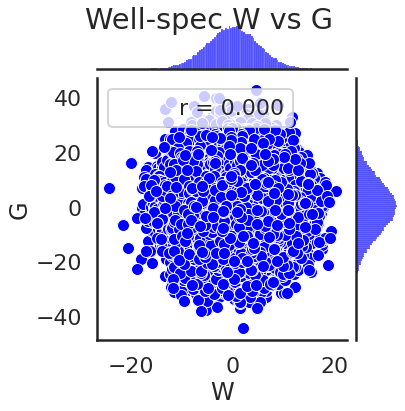

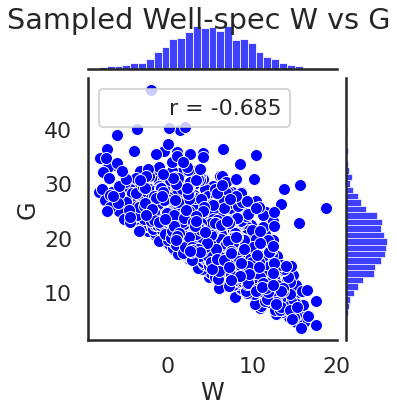

In [ ]:

plot_joint(model_well_sp, 'W', 'G', num_samples=num_samples,
           color='b', annotate=True, comment='Well-spec')

sub_sample_and_plot(model_well_sp, 'W', 'G', 'S', num_samples=num_samples,
                    color='b', annotate=True, comment='Sampled Well-spec')
